In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
image4 = cv.imread('/content/drive/My Drive/BOOTCAMP MACHINE LEARNING/Images/A12/4-min.png')
image4_orig = image4.copy()

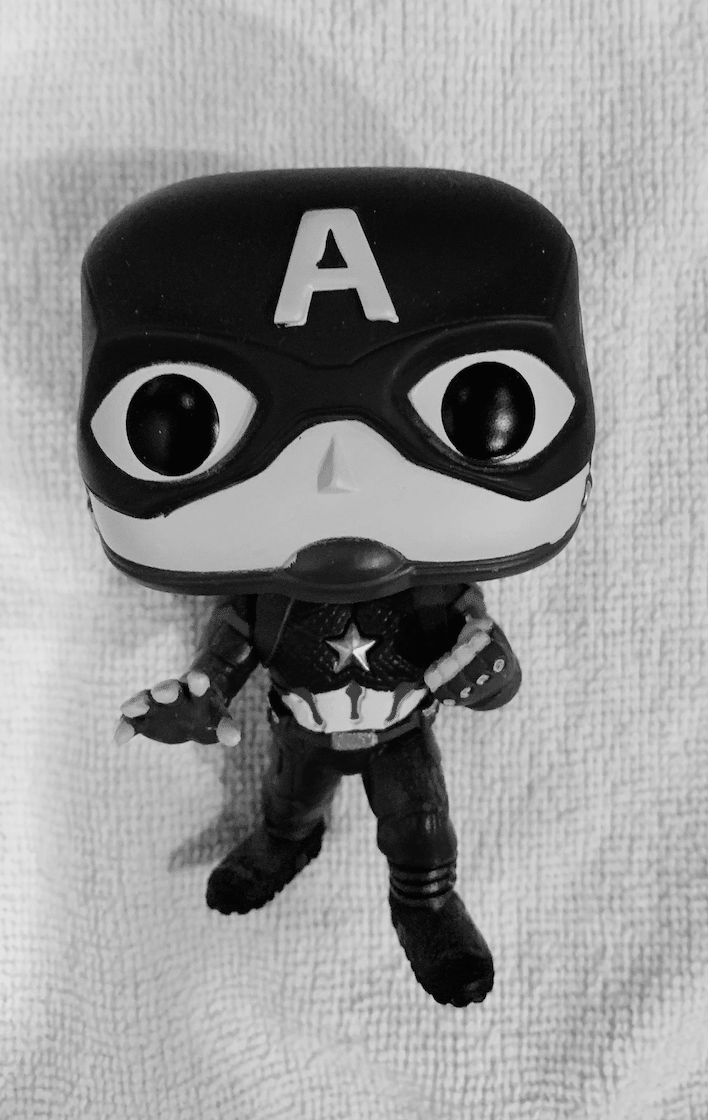

In [3]:
image4_gray = cv.cvtColor(image4, cv.COLOR_BGR2GRAY)
cv2_imshow(image4_gray)

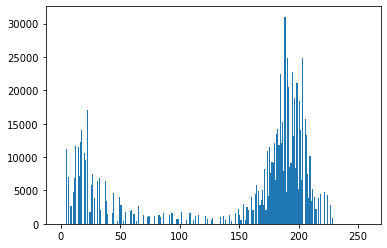

In [4]:
plt.hist(image4_gray.flatten(), 256, [0,256])
plt.show()

127.0


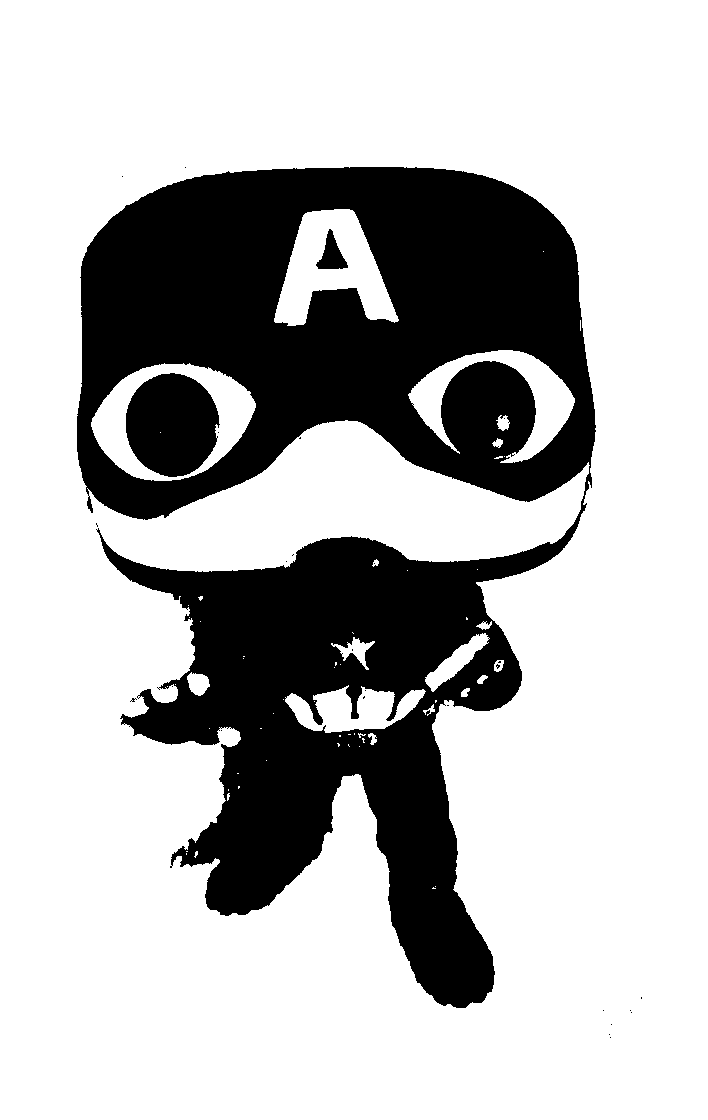

In [20]:
thresholding_value4, thresholding_result4 = cv.threshold(image4_gray, 127, 255, cv.THRESH_BINARY)
print(thresholding_value4)
cv2_imshow(thresholding_result4)

# thresholding_value4, thresholding_result4 = cv.threshold(image4_gray, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
# print(thresholding_value4)
# cv2_imshow(thresholding_result4)

# thresholding_result4 = cv.adaptiveThreshold(image4_gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)

# cv2_imshow(thresholding_result4)

In [21]:
thresholding_result4= cv.bitwise_not(thresholding_result4)

contours4, hierarchy4 = cv.findContours(thresholding_result4, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

print(contours4)

[array([[[ 610, 1037]]], dtype=int32), array([[[ 609, 1034]]], dtype=int32), array([[[ 611, 1024]]], dtype=int32), array([[[ 631, 1012]]], dtype=int32), array([[[ 630, 1010]]], dtype=int32), array([[[ 603, 1010]]], dtype=int32), array([[[641, 997]],

       [[641, 998]]], dtype=int32), array([[[221, 730]]], dtype=int32), array([[[447, 705]],

       [[448, 705]]], dtype=int32), array([[[132, 698]],

       [[132, 699]],

       [[130, 701]],

       [[131, 700]],

       [[132, 701]],

       [[134, 701]],

       [[133, 700]],

       [[135, 698]],

       [[136, 699]],

       [[135, 698]],

       [[134, 699]],

       [[133, 698]]], dtype=int32), array([[[172, 686]]], dtype=int32), array([[[286, 561]]], dtype=int32), array([[[293, 554]],

       [[292, 555]]], dtype=int32), array([[[ 96, 523]],

       [[ 96, 524]],

       [[ 97, 525]],

       [[ 97, 526]],

       [[ 97, 525]],

       [[ 96, 524]]], dtype=int32), array([[[300, 437]],

       [[299, 438]],

       [[300, 438]]],

In [22]:
print(len(contours4))

area4 = cv.contourArea(contours4[0])
print(area4)

x, y, w, h = cv.boundingRect(contours4[0])

print(x, y, w, h)

18
0.0
610 1037 1 1


In [23]:
for index, attri in enumerate(contours4):
  x, y, w, h = cv.boundingRect(attri)
  area4 = cv.contourArea(attri)

  print("Contour ke- " + str(index), x, y, w, h, area4)

Contour ke- 0 610 1037 1 1 0.0
Contour ke- 1 609 1034 1 1 0.0
Contour ke- 2 611 1024 1 1 0.0
Contour ke- 3 631 1012 1 1 0.0
Contour ke- 4 630 1010 1 1 0.0
Contour ke- 5 603 1010 1 1 0.0
Contour ke- 6 641 997 1 2 0.0
Contour ke- 7 221 730 1 1 0.0
Contour ke- 8 447 705 2 1 0.0
Contour ke- 9 130 698 7 4 5.5
Contour ke- 10 172 686 1 1 0.0
Contour ke- 11 286 561 1 1 0.0
Contour ke- 12 292 554 2 2 0.0
Contour ke- 13 96 523 2 4 0.0
Contour ke- 14 299 437 2 2 0.5
Contour ke- 15 122 176 1 1 0.0
Contour ke- 16 77 167 519 841 246156.5
Contour ke- 17 185 167 1 1 0.0


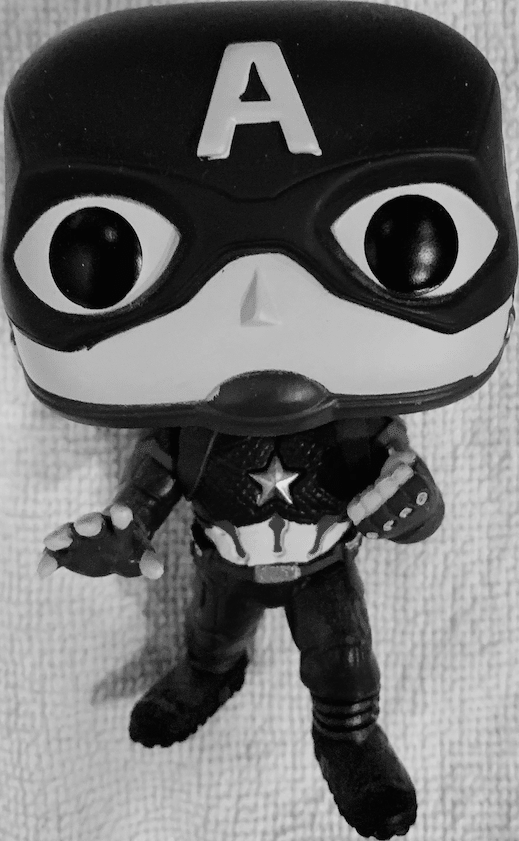

In [24]:
x, y, w, h = cv.boundingRect(contours4[16])

kapten = image4_gray[y:y+h, x:x+w]

cv2_imshow(kapten)

In [ ]:
print(w, h)
print(x,y)

In [ ]:
cv.rectangle(image4_orig, (x,y), (x+w,y+h), (255,0,0), 2)
font = cv.FONT_HERSHEY_SIMPLEX 
org = (w, y-3)
fontScale = 1
color = (255, 0, 0) #B, G, R
thickness = 2
text = '519x841'

image4_orig = cv.putText(image4_orig, text, org, font, fontScale, color, thickness, cv.LINE_AA) 

cv2_imshow(image4_orig)